#                              WORLD HAPPINESS SCORE 

# Feature variable:
Country
Region
Happiness Rank
Standard Error                   
Economy (GDP per Capita)         
Family                           
Health (Life Expectancy)        
Freedom                          
Trust (Government Corruption)    
Generosity     
Dystopia Residual 

# Target variable:
Happiness Score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#                                          Analysis

In [3]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
# There is no missing values

In [5]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
# There are two object data type which we can't consider so we encode them.

In [7]:
# Encode the string data

enc=OrdinalEncoder()

In [8]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [9]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
data.dtypes

Country                          float64
Region                           float64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [11]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
#                            Happiness Score of describe of datasets:
    
From the plotting heatmap we determine the mean,standard deviation ,minmum and maximum value of each column.   

  Total number of rows and columns in the datasets
    158 rows
    11 columns    
    Country:
        Mean: 78.500000
        Std:  45.754781
        Minimum: 0.000000
        Maximum: 157.000000 
            
    Region: 
        Mean: 5.120253
        Std:  2.99331
        Minimum: 0.000000
        Maximum: 9.000000
    
    Happiness Rank: 
        Mean: 79.493671
        Std:  45.754363
        Minimum: 1.000000
        Maximum: 158.000000
            
    Standard error:
        Mean: 0.047885
        std:  0.017146
        Minimum: 0.018480
        Maximum: 0.136930
    
    Economy: 
        Mean: 0.846137
        std:  0.403121
        Minimum: 0.0000000
        Maximum: 1.690420
    
    Family:
        Mean: 0.991046
        std:  0.272369
        Minimum: 0.000000
        Maximum: 1.402230
    
    Health: 
        Mean: 0.630259
        std:  0.247078
        Minimum: 0.000000
        Maximum: 1.025250
    
    Freedom:
        Mean: 0.428615
        std:  0.150693
        Minimum: 0.000000
        Maximum: 0.669730
    
    Trust: 
        Mean: 0.143422
        std:  0.120034 
        Minimum: 0.000000
        Maximum: 0.551910
    
    Generosity:
        Mean: 0.237296
        std:  0.126685
        Minimum: 0.000000
        Maximum: 0.795880
    
    Dystopia Residual:
        Mean: 2.098977
        std:  0.553550
        Minimum: 0.328580
        Maximum: 3.602140

#                                       Visualization 

In [ ]:
# For nominal data we use countplot plot

Country
Region

In [12]:
data_visualization_nominal=data[['Country','Region']].copy()

In [13]:
data_visualization_nominal.columns

Index(['Country', 'Region'], dtype='object')

135.0    1
10.0     1
51.0     1
77.0     1
57.0     1
        ..
70.0     1
125.0    1
81.0     1
101.0    1
141.0    1
Name: Country, Length: 158, dtype: int64


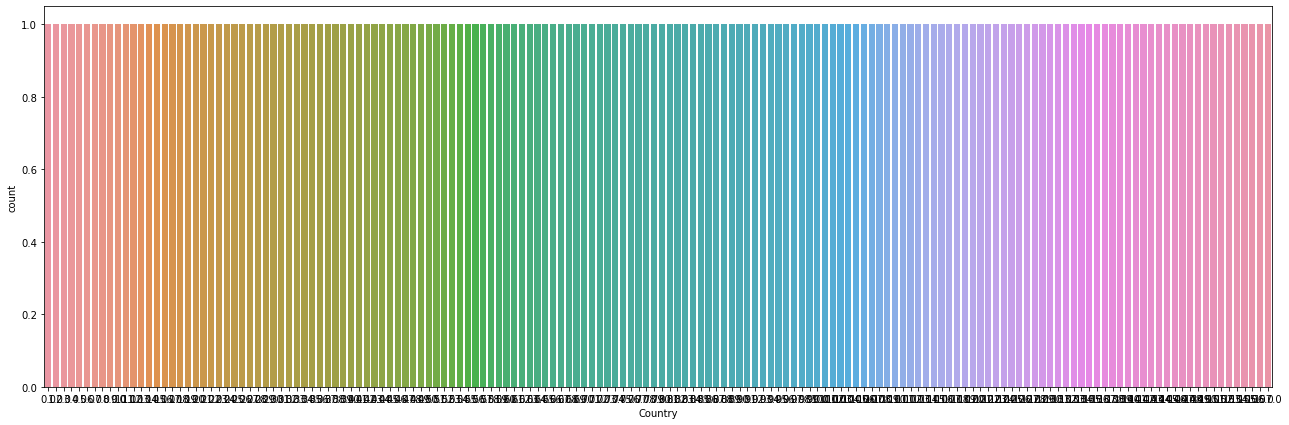

In [14]:
plt.figure(figsize=(22,7))
ax= sns.countplot(x='Country',data=data_visualization_nominal)
print(data_visualization_nominal['Country'].value_counts())

8.0    40
1.0    29
3.0    22
9.0    21
4.0    20
6.0     9
7.0     7
2.0     6
5.0     2
0.0     2
Name: Region, dtype: int64


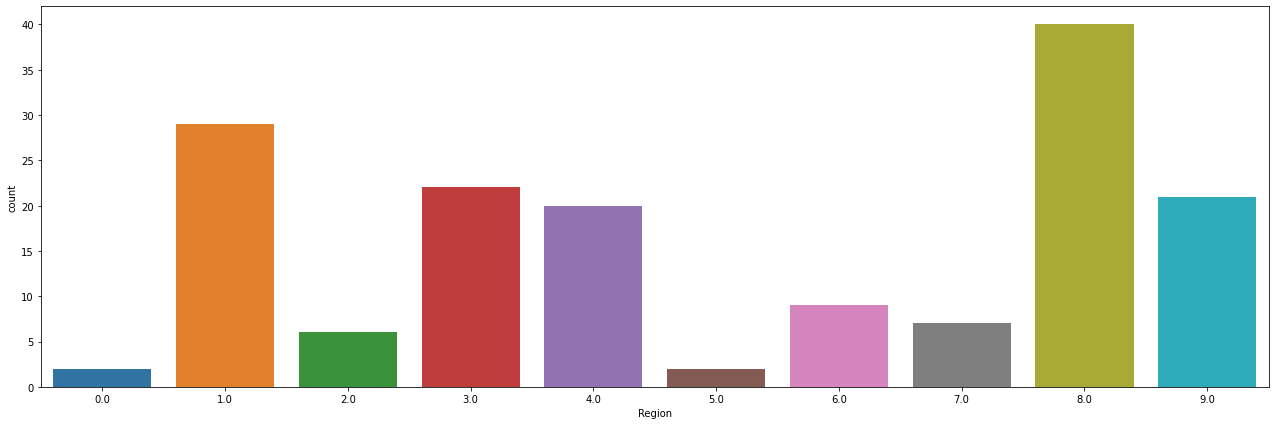

In [15]:
plt.figure(figsize=(22,7))
ax= sns.countplot(x='Region',data=data_visualization_nominal)
print(data_visualization_nominal['Region'].value_counts())

In [ ]:
# For continuous data we use distribution plot

Happiness Score                  
Standard Error                   
Economy (GDP per Capita)         
Family                           
Health (Life Expectancy)        
Freedom                          
Trust (Government Corruption)    
Generosity                       
Dystopia Residual 

In [16]:
data_visualization_continuous=data[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family',
                                'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity',
                                'Dystopia Residual']].copy()

In [17]:
data_visualization_continuous.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

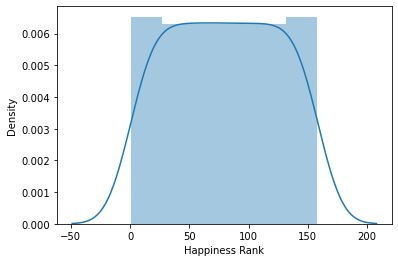

In [18]:
sns.distplot(data_visualization_continuous['Happiness Rank'],kde=True)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

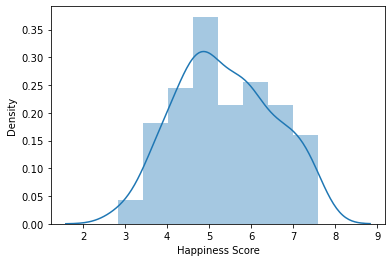

In [19]:
# Target variable

sns.distplot(data_visualization_continuous["Happiness Score"],kde=True) 

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

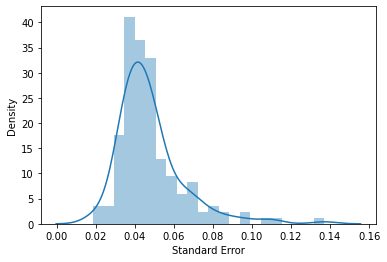

In [20]:
sns.distplot(data_visualization_continuous["Standard Error"],kde=True) 

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

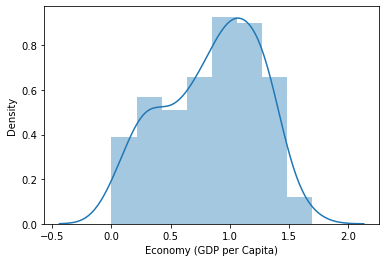

In [21]:
sns.distplot(data_visualization_continuous["Economy (GDP per Capita)"],kde=True)

<AxesSubplot:xlabel='Family', ylabel='Density'>

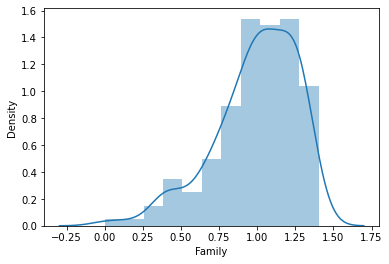

In [22]:
sns.distplot(data_visualization_continuous["Family"],kde=True)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

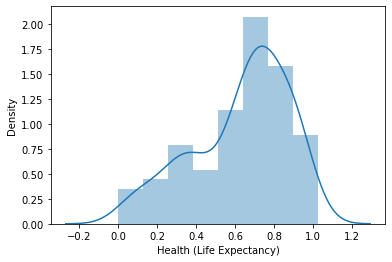

In [23]:
sns.distplot(data_visualization_continuous["Health (Life Expectancy)"],kde=True)

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

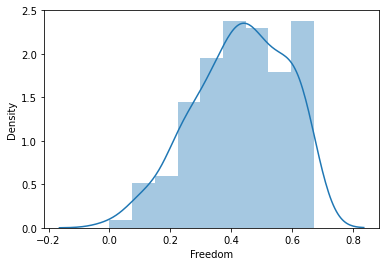

In [24]:
sns.distplot(data_visualization_continuous["Freedom"],kde=True) 

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

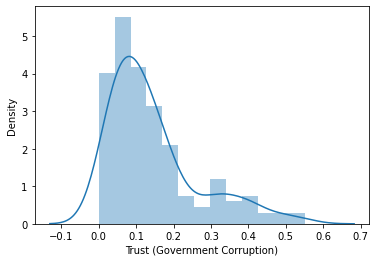

In [25]:
sns.distplot(data_visualization_continuous["Trust (Government Corruption)"],kde=True)

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

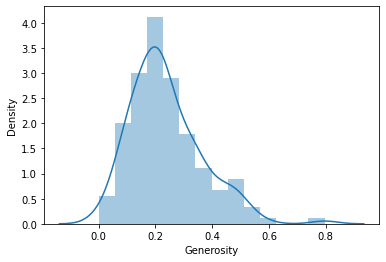

In [26]:
sns.distplot(data_visualization_continuous["Generosity"],kde=True)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

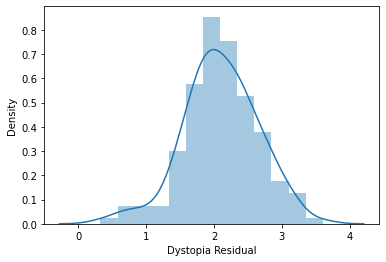

In [27]:
sns.distplot(data["Dystopia Residual"],kde=True) 

In [ ]:
# Check the correlation 

In [28]:
data.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

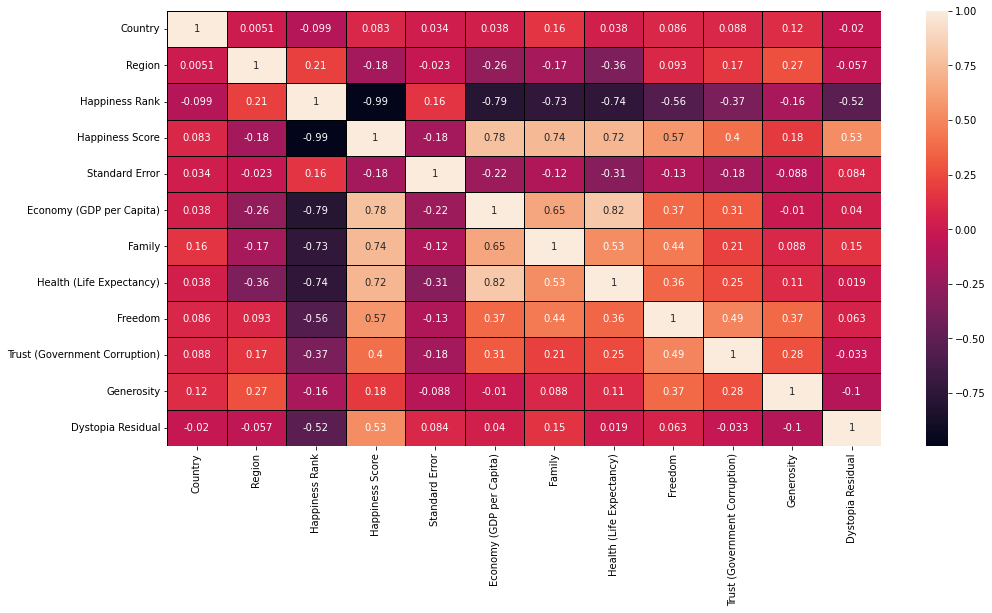

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

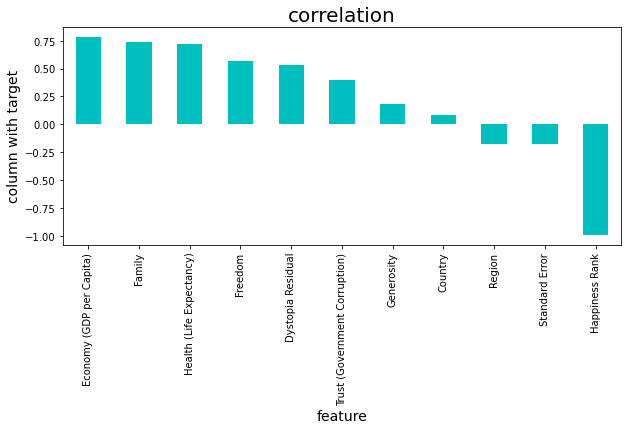

In [30]:
# Relation b/w target variable to the feature variable

plt.figure(figsize=(10,4))
data.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target',fontsize=14)
plt.title("correlation",fontsize=20)
plt.show()

In [31]:
data.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [ ]:
# HAPPINESS SCORE OF CORRELATION


Happiness Rank,Standard error,Region are negatively correlated with the target column.

Country,Generosity,Trust,Dystopia Residual,Freedom,Health,Family and Economy are positively correlated with the target colum

 * Country has 8% correlation with the target column which can be considerd as a weak bond
 * Region has 17% correlation with the target column which can be considerd as a weak bond
 * Happiness Rank has 99% correlation with the target column which can be considerd as a weak bond
 * Standard error has 17% correlation with the target column which can be considerd as a weak bond 
 * Economy has 78% correlation with the target column which can be considerd as a strong bond
 * Family has 74% correlation with the target column which can be considerd as a strong bond
 * Health has 72% correlation with the target column which can be considerd as a strong bond
 * Freedom has 56% correlation with the target column which can be considerd as a good bond
 * Trust  has 39% correlation with the target column which can be considerd as a good bond
 * Generosity has 18% correlation with the target column which can be considerd as a good bond
 * Dystpia Residual 53% correlation with the target column which can be considerd as a good bond

Maximum correlation: Economy
    
Minimum correlation: Happiness Rank   

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.9 KB


In [ ]:
# Skewness and outliers method are not use on the categorical data and target variable

In [33]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
# Skewness of the Happiness score :Skewness threshold is taken (-0.5,+0.5).Columns which having skewness
    
    Standard Error
    Family     
    Health (Life Expectancy)
    Trust (Government Corruption)
    Generosity 

<AxesSubplot:>

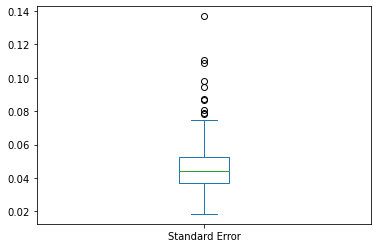

In [35]:
data['Standard Error'].plot.box()

<AxesSubplot:>

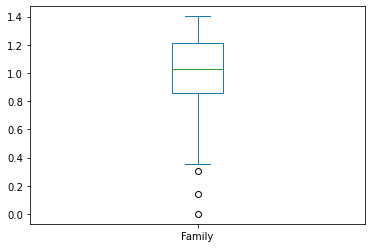

In [36]:
data['Family'].plot.box()

<AxesSubplot:>

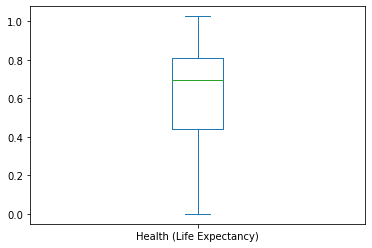

In [37]:
data['Health (Life Expectancy)'].plot.box()

# Health shows no skewness 

<AxesSubplot:>

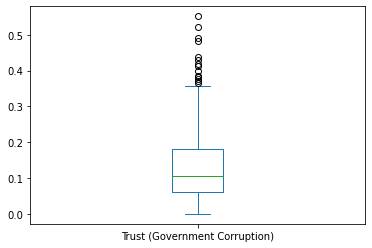

In [38]:
data['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

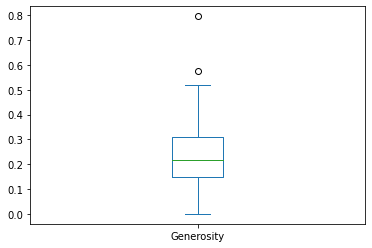

In [39]:
data['Generosity'].plot.box()

In [40]:
data.corr()['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [41]:
delete= pd.DataFrame([["-0.177254","Standard Error","No","Alot"]],
                    columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.177254,Standard Error,No,Alot


In [42]:
delete1=pd.DataFrame([["-0.992105","Happiness Rank","Alot","Uniform"],["0.083380","Country","Alot","Uniform"],["-0.176791",
                      "Region","lot","Uniform"]],columns=["Correlation with Target","Column Name","Deviation","Distributed"])

delete1

,Correlation with Target,Column Name,Deviation,Distributed
0,-0.992105,Happiness Rank,Alot,Uniform
1,0.083380,Country,Alot,Uniform
2,-0.176791,Region,lot,Uniform


In [43]:
data=data.drop(["Country","Region","Happiness Rank","Standard Error"],axis=1)
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [44]:
# zscore technique is used to remove the outliers

z=np.abs(zscore(data))
z.shape

(158, 8)

In [45]:
z

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [46]:
# threshold = (-3,3)

threshold=3

print(np.where(z>3))

# first point the location where the outliers are present and second shows gives the no. of column 

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [47]:
len(np.where(z>3)[0])

6

In [48]:
data_new=data[(z<3).all(axis=1)]

In [49]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (158, 8)
New data frame: (152, 8)
Total dropped rows: 6


In [50]:
# Percentage data loss

loss_percentage=(158-153)/158*100
print(loss_percentage,'%')

# Data is not categorical/target variable and loss is approx 3% which may be acceptable.

3.1645569620253164 %


In [ ]:
data_new.head()

#                                    Modeling

In [52]:
# Independent variable

x = data_new.drop(columns = ['Happiness Score'])

In [53]:
# Target variable

y = data_new['Happiness Score']

In [54]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [55]:
# Transform the data into standard normal distribution

s=StandardScaler()
x_scaler=s.fit_transform(x)
x_scaler

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [ ]:
# We check all the regressor model and we find that linear regression model givs the better score for the datasets so we use it.

In [56]:
lr=LinearRegression()

In [59]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print(f"random_state {i},the training accuracy is:",round(r2_score(y_train,pred_train)*100,2))
        print(f"random_state {i},the test accuracy is:",round(r2_score(y_test,pred_test)*100,2))
        print("\n")

random_state 35,the training accuracy is: 99.42
random_state 35,the test accuracy is: 99.42


random_state 84,the training accuracy is: 99.43
random_state 84,the test accuracy is: 99.43


random_state 95,the training accuracy is: 99.42
random_state 95,the test accuracy is: 99.42


random_state 213,the training accuracy is: 99.42
random_state 213,the test accuracy is: 99.42


random_state 251,the training accuracy is: 99.42
random_state 251,the test accuracy is: 99.42


random_state 312,the training accuracy is: 99.42
random_state 312,the test accuracy is: 99.42


random_state 451,the training accuracy is: 99.41
random_state 451,the test accuracy is: 99.41


random_state 521,the training accuracy is: 99.4
random_state 521,the test accuracy is: 99.4


random_state 549,the training accuracy is: 99.41
random_state 549,the test accuracy is: 99.41


random_state 565,the training accuracy is: 99.42
random_state 565,the test accuracy is: 99.42


random_state 637,the training accuracy is: 99.42

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.20,random_state =922 )


In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_train_pred=lr.predict(x_train)

In [64]:
Score=r2_score(y_train,y_train_pred)
print("R square score for Trained data",Score)

R square score for Trained data 0.9942385037069237


In [65]:
y_test_pred=lr.predict(x_test)

In [66]:
Score=r2_score(y_test,y_test_pred)
print("R square score for Test data",Score)

R square score for Test data 0.9941517076083337


In [67]:
# Check Cross validation score

for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} ")
    print("\n")

At cross fold 2 the cv score is 0.8273874754937607 


At cross fold 3 the cv score is 0.8954106852740371 


At cross fold 4 the cv score is 0.8301795008999019 


At cross fold 5 the cv score is 0.8046524369106314 


At cross fold 6 the cv score is 0.7308421845362078 


At cross fold 7 the cv score is 0.5977239568001311 


At cross fold 8 the cv score is 0.5410340726653109 


At cross fold 9 the cv score is 0.5028894401906405 




In [68]:
lrscore=cross_val_score(lr,x_scaler,y,cv=3)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 89.54106852740371


In [70]:
print("MAE:",mean_absolute_error(y_test,y_test_pred)*100)

MAE: 5.8939734608026875


In [71]:
print("MSE:",mean_squared_error(y_test,y_test_pred)*100)

# MSE is approx to  zero

MSE: 0.4841536095729915


In [73]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred))*100)

RMSE: 6.958114755973714


In [74]:
x_sm = sm.add_constant(x)
model=sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3576.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.73e-158
Time:                        16:58:03   Log-Likelihood:                 162.20
No. Observations:                 152   AIC:                            -308.4
Df Residuals:                     144   BIC:                            -284.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4307      0.007    782.889      0.000       5.417       5.444
x1             0.3904      0.015     26.469      0.000       0.361       0.420
x2             0.2485      0.010     24.442      0.000       0.228       0.269
x3             0.2535      0.013     19.183      0.000       0.227       0.280
x4             0.1548      0.010     15.385      0.000       0.135       0.175
x5             0.0727      0.008      8.911      0.000       0.057       0.089
x6             0.0984      0.008     12.162      0.000       0.082       0.114
x7             0.5107      0.007     72.128      0.000       0.497       0.525
==============================================================================
Omnibus:                       14.154   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.374
Skew:                          -0.570   Prob(JB):                     0.000102
Kurtosis:                       4.265   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

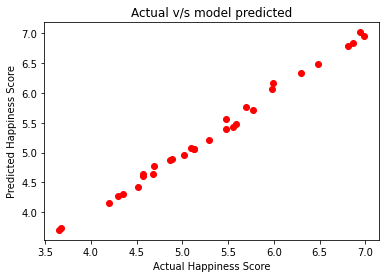

In [75]:
plt.scatter(y_test,y_test_pred,color="r")
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual v/s model predicted')
plt.show()

In [ ]:
# CONCLUSION:

  # R square is 99.4% by predicting and by regression result.
  # MSE is approx to zero
  #The actual and predicted both are linearly distributed,it means there is little bit difference

# This show the regression model is best model to analyse the World Happiness Record.

In [76]:
# The data frame of actual and predicted values

Output_data=pd.DataFrame({'Actual data':y_test,"Predicted data":y_test_pred})
Output_data

,Actual data,Predicted data
100,4.867,4.884188
65,5.695,5.770197
46,5.984,6.070875
17,6.940,7.015761
118,4.518,4.427385
68,5.589,5.480074
76,5.286,5.213057
110,4.681,4.647639
69,5.548,5.432181
22,6.810,6.793511
